# Comparison of Importance Sampling Methods - Figures

In [1]:
options(
    repr.plot.width = 8, 
    repr.plot.height = 5,
    # silence tidyverse messages
    tidyverse.quiet = TRUE,
    dplyr.summarise.inform = FALSE,
    dplyr.ungroup.inform = FALSE,
    readr.show_progress = FALSE,
    readr.show_col_types = FALSE
)

library(tidyverse)
library(latex2exp)
library(patchwork)
library(here)
library(tikzDevice)
library(ggsci)

default_width <- 8
default_height <- 5
ggsave_tikz <- function(filename, plot=last_plot(), width=default_width, height=default_height, ...) {
    tikz(filename, width=width,height=height, ...)
    print(plot)
    dev.off()
}


theme_set(theme_minimal())
df_are_mu <- read_csv(here("data/figures/are_mu.csv"))
df_are_sigma2 <- read_csv(here("data/figures/are_sigma2.csv"))

df_rho_ce <- read_csv(here("data/figures/rho_cem_sigma2.csv"))
df_rho_eis <- read_csv(here("data/figures/rho_eis_sigma2.csv"))

rename_scenario <- function(df) {
    df %>% rename(
        "$\\mathcal N (0, 1)$" = 2,
        "loc. mixture, $\\omega^2 = 0.1$" = 3,
        "loc. mixture, $\\omega^2= 0.5$" = 4,
        "loc. mixture, $\\omega^2 = 1$" = 5,
        "scale mixture, $\\rho^2 = 0.01$" = 6,
        "scale mixture, $\\rho^2 = 0.1$" = 7,
        "scale mixture, $\\rho^2 = 0.5$" = 8
    )
}

add_type <- function(df) {
    df %>% mutate(type_short = str_sub(name, 1, 3)) %>%
    mutate(type = case_when(
        type_short == "$\\m" ~ "normal",
        type_short == "loc" ~ "location mixture",
        type_short == "sca" ~ "scale mixture"
    )) %>%
    mutate(type = factor(type, levels=c("normal", "location mixture", "scale mixture")))
}

here() starts at /Users/stefan/workspace/work/phd/thesis



Warning message in scale_y_log10(breaks = 10^(-2:2), labels = paste0("$10^{", -2:2, :
"log-10 transformation introduced infinite values."
Warning message in scale_y_log10(breaks = 10^(-2:2), labels = paste0("$10^{", -2:2, :
"log-10 transformation introduced infinite values."
Warning message in scale_y_log10(breaks = 10^(-2:2), labels = paste0("$10^{", -2:2, :
"log-10 transformation introduced infinite values."
Warning message in scale_y_log10(breaks = 10^(-2:2), labels = paste0("$10^{", -2:2, :
"log-10 transformation introduced infinite values."


pdf 
  2

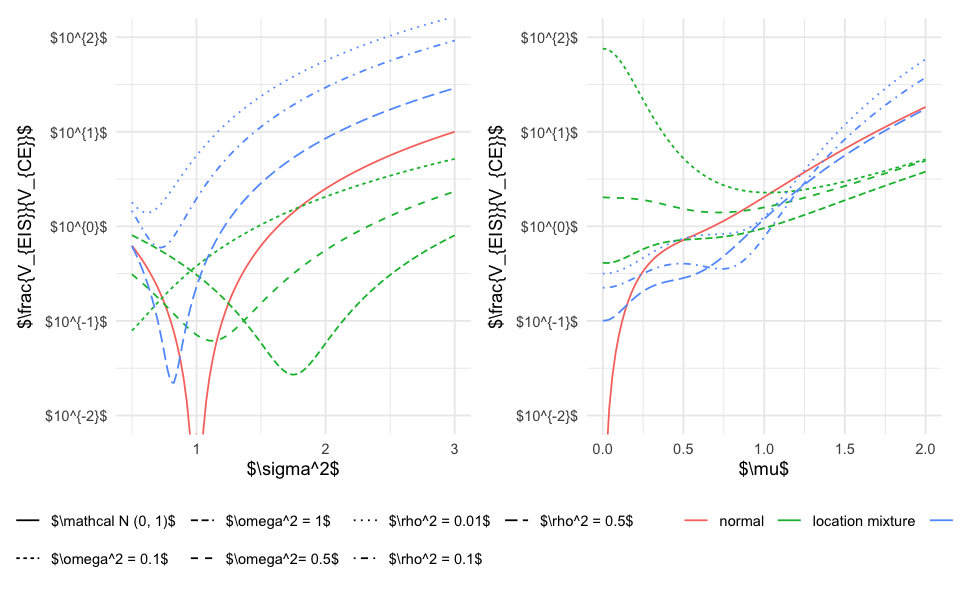

In [2]:
df_are_mu_fig <- df_are_mu %>%
    rename_scenario %>%
    pivot_longer(-sigma2) %>%
    add_type()

df_are_sigma2_fig <- df_are_sigma2 %>%
    rename_scenario() %>%
    pivot_longer(-mu) %>%
    add_type()
    
    
plt_mu <-  df_are_mu_fig %>%
    mutate(name = str_extract(name, "\\$.*\\$")) %>%
    ggplot(aes(sigma2, value, linetype=name, color = type)) +
    geom_line() +
    coord_cartesian(ylim = c(1e-2, 1e2))+
    scale_y_log10(breaks = 10^(-2:2), labels = paste0("$10^{",-2:2,"}$")) +
    scale_linetype_discrete(name = "") +
    scale_color_discrete(name="") +
    labs(x = "$\\sigma^2$", y = "$\\frac{V_{EIS}}{V_{CE}}$")

plt_sigma2 <-  df_are_sigma2_fig %>%
    mutate(name = str_extract(name, "\\$.*\\$")) %>%
    ggplot(aes(mu, value, linetype=name, color = type)) +
    geom_line() +
    coord_cartesian(ylim = c(1e-2, 1e2))+
    scale_y_log10(breaks = 10^(-2:2), labels = paste0("$10^{",-2:2,"}$")) +
    scale_linetype_discrete(name = "") +
    scale_color_discrete(name="") +
    labs(x = "$\\mu$", y = "$\\frac{V_{EIS}}{V_{CE}}$")

(plt_mu | plt_sigma2) + plot_layout(guides = "collect") &
  theme(legend.position='bottom')

ggsave_tikz(here("tikz/are.tex"))

Joining with `by = join_by(mu, name, type_short, type)`


pdf 
  2

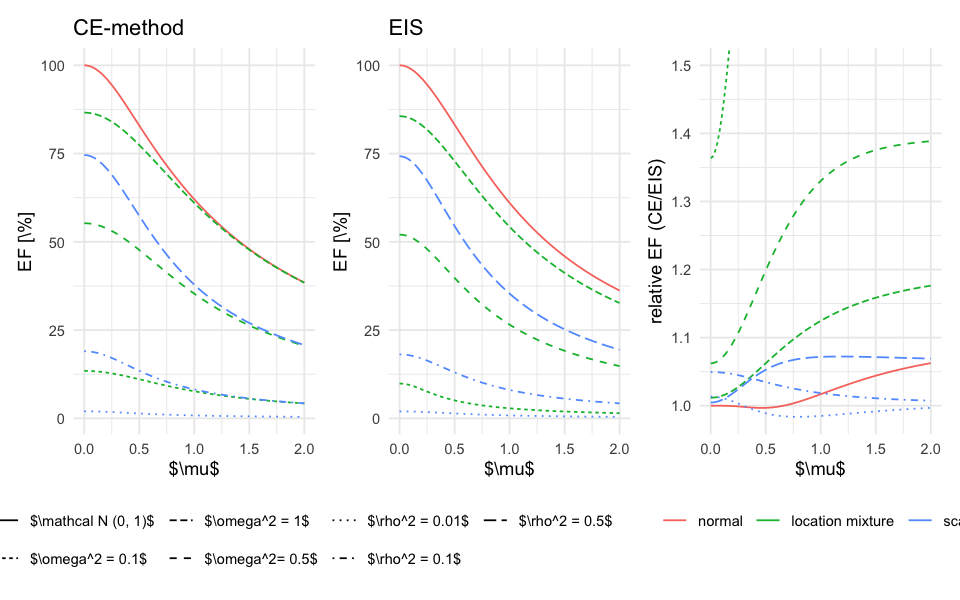

In [3]:
df_rho_ce_fig <- df_rho_ce %>%
    rename_scenario %>%
    pivot_longer(-mu) %>%
    add_type() %>%
    mutate(name = str_extract(name, "\\$.*\\$")) %>%
    rename("rho" = value) %>%
    mutate("EF" = 1/rho * 100)
df_rho_eis_fig <- df_rho_eis %>%
    rename_scenario %>%
    pivot_longer(-mu) %>%
    add_type() %>%
    mutate(name = str_extract(name, "\\$.*\\$")) %>%
    rename("rho" = value) %>%
    mutate("EF" = 1/rho * 100)

scales_fig <- list(
    scale_linetype_discrete(name = ""),
    scale_color_discrete(name="")
)


p1 <- df_rho_ce_fig %>%
    ggplot(aes(mu, EF, color = type, linetype = name)) +
    geom_line() +
    labs(x="$\\mu$", y="EF [\\%]") +
    scales_fig +
    ggtitle("CE-method")
p2 <- df_rho_eis_fig %>%
    ggplot(aes(mu, EF, color = type, linetype = name)) +
    geom_line() +
    labs(x="$\\mu$", y="EF [\\%]") +
    scales_fig+
    ggtitle("EIS")

p3 <- select(rename(df_rho_ce_fig, "CE" = "EF"), -rho) %>%
    inner_join(select(rename(df_rho_eis_fig, "EIS"="EF"), -rho)) %>%
    mutate(`relative EF` = CE/EIS) %>%
    ggplot(aes(mu, `relative EF`, color = type, linetype = name)) +
    geom_line()+
    coord_cartesian(ylim = c(NA, 1.5)) +
    scales_fig + 
    xlab("$\\mu$") +
    ylab("relative EF (CE/EIS)")


(p1 | p2 | p3) + plot_layout(guides = "collect") & theme(legend.position = "bottom")

ggsave_tikz(here("tikz/rho.tex"))